In [115]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


[5]
[2]
True


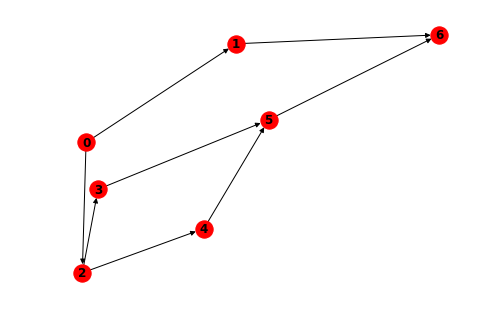

In [148]:
#Degendancy graph init

def initGraph(M):
    N = len(M)
    DG = nx.DiGraph()
    for i in range(0, N):
        for j in range(0, N):
            if (M[i][j] != 0):
                DG.add_edge(i, j)
    return DG

DG_matrix = [
    [0,1,1,0,0,0,0],
    [0,0,0,0,0,0,1],
    [0,0,0,1,1,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0]
]

#DG = nx.DiGraph()
#DG.add_edges_from([(1, 2), (1, 3), (3,4), (3,5), (4,6), (5,6), (6,7), (2,7)]) #1 - start, 7 - end
DG = initGraph(DG_matrix)
print list(DG.successors(3))
print list(DG.predecessors(3))

print nx.is_directed_acyclic_graph(DG)

nx.draw(DG, with_labels=True, font_weight='bold')

[(0, {'weight': 17}), (1, {'weight': 2}), (2, {'weight': 8}), (3, {'weight': 3}), (4, {'weight': 3}), (5, {'weight': 2}), (6, {'weight': 1})]


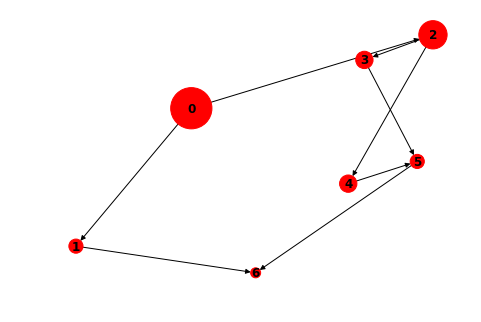

In [151]:
#1 Simple recursive ranking of dependency graph

def resetWeights(DG):
    j = len(DG.nodes)-1
    addWeightToNode(DG, j, 0, reset=True)

def addWeights(DG):
    j = len(DG.nodes)-1
    addWeightToNode(DG, j, 1)

    
def addWeightToNode(DG, j, w, reset=False):
    if (reset):
        DG.add_node(j, weight=0)
    else:
        DG.add_node(j, weight=w)
    preds = list(DG.predecessors(j))
    for i in preds:
        try:
            w_i = DG.nodes[i]['weight']
        except:
            print "Error: weight not defined."
            w_i = 0
        addWeightToNode(DG, i, w+1+w_i, reset)
        
        
resetWeights(DG)        
addWeights(DG)

def showWeightDG(DG, coef=100):
    print DG.nodes.data()
    node_sizes = [coef*DG.nodes[i]['weight'] for i in range(0, len(DG.nodes))]
    nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes)
    
showWeightDG(DG)

set([1, 2, 3, 4, 5, 6])
set([6])
set([3, 4, 5, 6])
set([5, 6])
set([5, 6])
set([6])
set([])
[(0, {'weight': 6}), (1, {'weight': 1}), (2, {'weight': 4}), (3, {'weight': 2}), (4, {'weight': 2}), (5, {'weight': 1}), (6, {'weight': 0})]


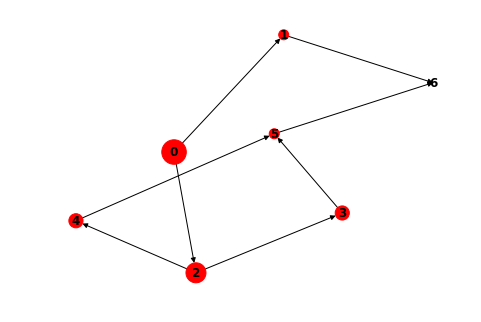

In [152]:
#2 Simple ranking of dependency graph from total number of successors

def addWeightsSuccessors(DG):
    for i in DG.nodes:
        tot_suc = getTotalSuccessors(DG, i)
        print tot_suc
        DG.add_node(i, weight=len(tot_suc))
    print DG.nodes.data()
    node_sizes = [100*DG.nodes[i]['weight'] for i in range(0, len(DG.nodes))]
    nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes)
    
    
def getTotalSuccessors(DG, i):
    suc_set = set()
    if (len(list(DG.successors(i))) != 0):
        suc_set |= set(list(DG.successors(i)))
        for j in list(DG.successors(i)):
            suc_set.update(getTotalSuccessors(DG, j))
    return suc_set
    

DG_suc = initGraph(DG_matrix)
addWeightsSuccessors(DG_suc)


In [153]:
print(set([1, 2]))

set([1, 2])


[0]
[1, 5]


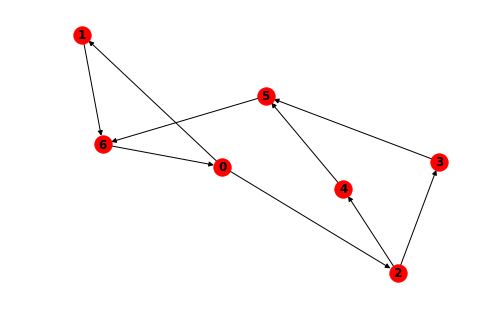

In [154]:
#Cycling graph 1 finish-to-start

def cycleMatrix(M):
    N = len(M)-1
    M_cyc = [row[:] for row in M]
    M_cyc[N][0] = 1
    return M_cyc

DG_cyc_matrix = cycleMatrix(DG_matrix)
DG_cyc = initGraph(DG_cyc_matrix)
print list(DG_cyc.successors(6))
print list(DG_cyc.predecessors(6))

nx.draw(DG_cyc, with_labels=True, font_weight='bold')

[[0.  0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0. ]]
[5.89767825e-01 5.75814668e-01 5.75814668e-01 4.97762663e-01
 4.97762663e-01 7.00341206e-17 1.75655252e-16]
0.5897678246195883
0.5758146677818641
0.5758146677818641
0.4977626627189451
0.4977626627189451
7.003412064343573e-17
1.756552523987249e-16


NodeDataView({0: {'weight': 0.5897678246195883}, 1: {'weight': 0.5758146677818641}, 2: {'weight': 0.5758146677818641}, 3: {'weight': 0.4977626627189451}, 4: {'weight': 0.4977626627189451}, 5: {'weight': 7.003412064343573e-17}, 6: {'weight': 1.756552523987249e-16}})

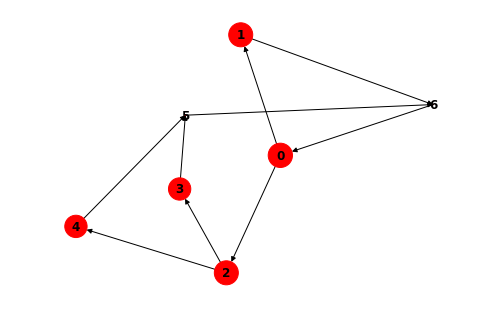

In [155]:
#PageRank for cycled dependency graph

def createPMatrix(M):
    N = len(M)
    P = np.zeros((N, N))
    for i in range(0, N):
        for j in range(0, N):
            if (M[i][j] != 0):
                s_j = getSuccessors(M,i)#count of i successors
                P[j][i] = 1./s_j
    return P #stochastic matrix
                
                
def getSuccessors(M, i):
    N = len(M)
    s = 0
    for j in range(0, N):
        s += M[i][j]
    return s

def getWeightsPageRank(M):
    P = createPMatrix(M)
    N = len(M)
    print P
    w, v = LA.eig(P)
    for i in range(0, len(w)):
        if (abs(w[i] - 1) < 0.00000001):
            weights = abs(v[i])
    return weights
        
            
def addWeightsToGraph(DG, weights):
    N = len(weights)
    for i in range(0, N):
        print weights[i]
        DG.add_node(i, weight=weights[i])
    node_sizes = [1000*DG.nodes[i]['weight'] for i in range(0, len(DG.nodes))]
    nx.draw(DG, with_labels=True, font_weight='bold', node_size=node_sizes)
    
    
weights = getWeightsPageRank(DG_cyc_matrix)
print weights
DG_cycPR = initGraph(DG_cyc_matrix)
addWeightsToGraph(DG_cycPR, weights)
DG_cycPR.nodes.data()